### Very Basic Extraction of Possibly Relevant Quotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
import math
import numpy as np

In [2]:
##TO DO LIST:
##add vocab to words DONE
#drop useless columns of dataframe merged and merged20 DONE
#do same analysis done for dataframe merged, in dataframe merged20:
#- normalize numOccurences DONE
#- groupby by speaker because some speaker talk a lot (bias in the nber of quotations per state) -> visualize the ones who talk the most. Are they present only in one state? To ensure nos speaker bias both for 2015 and 2020
#- plot comparison for 2015 and 2020 -> transform states into dummies? or dummies are only usefull for ML models?
#try dummies to normalize states for the plot comparison OR plot a different column 
#Graph: dist of hate crime related to gender identity per state -> remove states where there is none
#below "proportion of viral quotations in fct of the state in 2015" -> go deeper in the polemic sentence study (see text explaining the graph, especially last sentence)
#Graph: LGBT pop density in fct of state -> below i wrote "Further studies would be interesting to see if these states are related to the ones where we have the more quotations, or how they are related to hate crimes" -> realize these analysis
#Graph:Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state. In the scatterplot fct: use a dataframe where the %of same sex couple raising children is ordered (it's not ordered on the graph). And go deeper on why we have a negative correlation between these 2 variables.


In [3]:
politicians = pd.read_csv("data/politicians.csv")

In [4]:
names = politicians.speaker

In [5]:
words = ['lesbian', 'gay', 'homosexual', 'gender', 'bisexual', 'sexuality', 'same sex', 'ally',
         'asexual', 'bi', 'biphobia', 'bisexual', 'coming out', 'coming-out', 'gender identity',
        'queer', 'genderqueer', 'gender-queer', 'homophobia', 'LGBTQ', 'LGBT', 'LGBTQ+', 'LGBTQIA',
        'lgbtq', 'lgbt', 'lgbtq+', 'lgbtqia', 'non binary', 'non-binary', 'transgender'] 

In [6]:
politicians

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
690,Texas,Van Taylor
691,Texas,Veronica Escobar
692,Florida,W. Gregory Steube
693,South Carolina,William R. Timmons IV


Dataframe containing the size of each state, for further normalization:

In [7]:
state_area=pd.read_csv("data/states_area.csv", sep=';')
state_area=state_area.set_index('Rank')
state_area

,State,Sq Miles,% of U.S
Rank,,,
1,Alaska,"665,384.0",17.53%
2,Texas,"268,596.5",7.07%
3,California,"163,694.7",4.31%
4,Montana,"147,039.7",3.87%
5,New Mexico,"121,590.3",3.20%
6,Arizona,"113,990.3",3.00%
7,Nevada,"110,571.8",2.91%
8,Colorado,"104,093.7",2.74%
9,Oregon,"98,378.5",2.59%


In [11]:
population_size=pd.read_csv("data/annual_population.csv", sep=";")
population_size=population_size.set_index(['States'])
#remove dots present in front of some states names:
idx_list=[]
for idx,rows in population_size.iterrows():
    idx=idx.replace('.','')
    idx_list.append(idx)
population_size.index=idx_list
region=['United States', 'Northeast', 'Midwest', 'South', 'West']

#dataframe containing the annual (2015->2020) size of each USA region
population_size_region=population_size.loc[region]

index=population_size.index.to_list()
index=[x for x in index if x not in region]

#dataframe containing the annual (2015->2020) size of each USA state
population_size_state=population_size.loc[index]

#export to csv files, to use them in other functions:
population_size_state.to_csv(path_or_buf="data/population_size_state.csv", sep=';', index=True)
#population_size_region.to_csv(path_or_buf="data/population_size_region.csv", sep=';', index=True)

One way to upload the data: 
however it needs real large files, so we worked with an already made dataframe (created on the most robust computer of our group)

In [70]:
# only take rows with speakers in the congress or senator files
# only take rows with quotations that contain relevant words

#we created files with dataframes in order to make it easier to manipulate and don't run this cell that takes a lot
#of time and uses the whole quotes-2015.json.bz2
chunk_num = 1
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        
        return chunk.loc[chunk.speaker.isin(names) & (chunk.quotation.str.contains('{}'.format("|".join(words))))]
            
        

with pd.read_json('data/quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=100000) as df_reader:
    for chunk in df_reader:
        processed_chunk = process_chunk(chunk)
        if (chunk_num == 1):
            dataframe15 = processed_chunk
            chunk_num += 1
        else:
            dataframe15 = pd.concat([dataframe15, processed_chunk])
        



MemoryError: 

The already made dataframe:

In [71]:
# Merge quote data with speaker state data
dataframe15=pd.read_csv("data/df15.csv")
merged = pd.merge(dataframe15, politicians, on='speaker', how='inner').drop(columns=['state_y', 'Unnamed: 0'])
#drop useless columns:
merged=merged.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)
merged=merged.rename(columns={"state_x": "state"})
merged.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
368,But Sanders is not quite the gay rights vision...,Bernie Sanders,2015-10-06 23:26:00,1,['http://www.newnownext.com/lady-gaga-wears-he...,Vermont
422,"In 1996, I faced a very difficult political de...",Bernie Sanders,2015-10-27 15:39:13,1,['http://www.dailykos.com/story/2015/10/25/143...,Vermont
587,teachings on gay marriage are well known but t...,Dick Durbin,2015-12-16 14:41:43,1,['http://www.thenewcivilrightsmovement.com/dav...,Illinois
807,closing the gender wage gap and fostering wage...,Elizabeth Warren,2015-11-26 10:40:31,1,['http://onenewsnow.com/politics-govt/2015/11/...,Massachusetts
365,What they mean by `family values' is that wome...,Bernie Sanders,2015-10-05 16:14:10,1,['http://www.windycitymediagroup.com/lgbt/Bern...,Vermont


In [72]:
print("size of the data:",merged.shape)

size of the data: (844, 6)


To get an insight into the kind of quotations we are working with:

In [73]:
merged.quotation.sample(10)

815    If we don't see the pain of hardworking famili...
528    The flip side of it is: should a photographer ...
656    King said the `resolution expresses the sense'...
180    The Fortune 500 is running shamelessly to endo...
124    One person further asked how Heidi and I would...
714    And I'm hopeful, very hopeful, that the Suprem...
186    Imagine, hypothetically, you had a gay florist...
53     no medically valid reason to exclude transgend...
259    In New Hampshire, you said,' I will fight for ...
271    I don't think anybody should be fired for bein...
Name: quotation, dtype: object

Visualisation by states

In [74]:
print(merged['state'].value_counts().to_markdown(headers=[]))

|:---------------------|----:|
| Texas                | 198 |
| Vermont              | 158 |
| Florida              |  91 |
| California           |  62 |
| Kentucky             |  51 |
| Illinois             |  31 |
| South Carolina       |  24 |
| New York             |  17 |
| Colorado             |  14 |
| Wisconsin            |  13 |
| Washington           |  12 |
| Iowa                 |  12 |
| Ohio                 |  11 |
| Arizona              |  11 |
| New Jersey           |  11 |
| Georgia              |  11 |
| Hawaii               |  10 |
| Kansas               |   9 |
| Maine                |   8 |
| Utah                 |   8 |
| Arkansas             |   8 |
| Virginia             |   7 |
| Louisiana            |   6 |
| Oregon               |   6 |
| Oklahoma             |   5 |
| Massachusetts        |   5 |
| Tennessee            |   5 |
| Alaska               |   5 |
| Nevada               |   4 |
| Maryland             |   4 |
| Minnesota            |   3 |
| Nebras

**Let's see what is the distribution of speakers per state on the matter of gay rights**

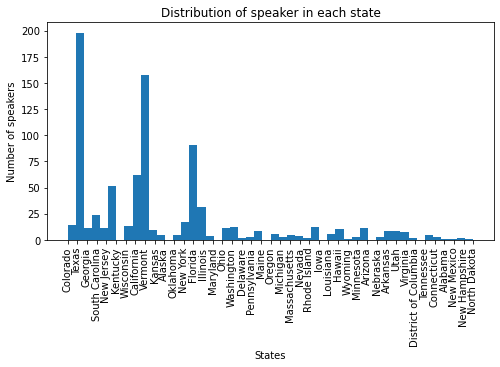

In [75]:
plt.figure(figsize=(8,4))
plt.hist(merged.state, bins= 50)
plt.xlabel('States')
plt.ylabel('Number of speakers')
plt.title('Distribution of speaker in each state')
plt.xticks(rotation = 90)
plt.show()

Something interesting is to compare/plot the distribution of **different** speakers per state. Indeed, some speakers may talk a lot about the topic, including a bias in the above distribution. In this case, if a state shows a high number of quotations, it won't necessarely mean that the topic is related a lot in the given state.

Comparison of the number of quotations between the speaker with the highest number of "gay rights" related quotations and the one with the smallest number: 

In [76]:
per_speaker=pd.DataFrame(merged.groupby("speaker")['numOccurrences'].sum())
max_per_speaker=per_speaker['numOccurrences'].idxmax()
max_nber=per_speaker['numOccurrences'].max()
min_per_speaker=per_speaker['numOccurrences'].idxmin()
min_nber=per_speaker['numOccurrences'].min()
print("In 2015:", "\nThe politician with the highest number of LGBT related quotations is {}".format(max_per_speaker), 
      "with {} quotations".format(max_nber), "\nThe one with the smallest number of LGBT related quotations is {}".format(min_per_speaker),
     "with {} quotations".format(min_nber))

In 2015: 
The politician with the highest number of LGBT related quotations is Bernie Sanders with 975 quotations 
The one with the smallest number of LGBT related quotations is Adrian Smith with 1 quotations


### We can do the same for year 2020, to obtain meaningfull comparison:

In [77]:
dataframe20=pd.read_csv("data/df20.csv")
merged_ = pd.merge(dataframe20, politicians, on='speaker', how='inner')
merged20=merged_.drop(columns=['state_y', 'Unnamed: 0'])
merged20=merged20.rename(columns={"state_x": "state"})
merged20=merged20.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)
merged20.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
206,The bisexuality is a huge part of it -- there'...,Katie Hill,2020-02-21 19:59:00,1,['http://makethewestgreatagain.wordpress.com/2...,California
25,"He has gotten some number of women-dozens, who...",Elizabeth Warren,2020-02-20 03:25:00,1,['https://www.nbcnews.com/politics/politics-ne...,Massachusetts
76,I'd like to talk about who we're running again...,Elizabeth Warren,2020-02-27 17:36:34,1,['http://historynewsnetwork.org/blog/154319'],Massachusetts
134,"long record of support for gay rights,",Bernie Sanders,2020-02-01 22:01:13,2,['https://www.lgbtqnation.com/2020/02/heres-ca...,Vermont
149,If you think a woman can't be elected you are ...,Bernie Sanders,2020-01-19 22:57:06,2,['http://europe.newsweek.com/bernie-sanders-sa...,Vermont


In [78]:
print("Size of the data for 2020:",merged20.shape, "\nSize of the data we've got for 2015:", merged.shape)

Size of the data for 2020: (277, 6) 
Size of the data we've got for 2015: (844, 6)


We have the same number of features to compare, but way more data for 2015 (three times more). Therefore, a standardization of the data will be really necessary. HOW CAN WE DEAL WITH IT??????????????

We observe that some quotations (=some rows) account for the same speaker, which creates a bias. For example, if a speaker talks a lot about this topic, the state from which he comes from will appear such as a state where the topic is important.  

**Exploration of merged data for 2020**

In [79]:
print(merged20['state'].value_counts().to_markdown(headers=[]))

|:---------------|----:|
| Massachusetts  | 109 |
| Vermont        |  60 |
| California     |  23 |
| Illinois       |  21 |
| Colorado       |  10 |
| Florida        |   8 |
| New York       |   6 |
| Texas          |   6 |
| Missouri       |   5 |
| Nevada         |   4 |
| Wisconsin      |   3 |
| Minnesota      |   3 |
| Hawaii         |   3 |
| Louisiana      |   2 |
| Maryland       |   2 |
| Utah           |   2 |
| Mississippi    |   1 |
| Ohio           |   1 |
| Kentucky       |   1 |
| Michigan       |   1 |
| South Carolina |   1 |
| New Jersey     |   1 |
| Pennsylvania   |   1 |
| Washington     |   1 |
| Tennessee      |   1 |
| New Hampshire  |   1 |


In [80]:
per_speaker20=pd.DataFrame(merged20.groupby("speaker")['numOccurrences'].sum())
max_per_speaker20=per_speaker20['numOccurrences'].idxmax()
max_nber20=per_speaker20['numOccurrences'].max()
min_per_speaker20=per_speaker20['numOccurrences'].idxmin()
min_nber20=per_speaker20['numOccurrences'].min()
print("In 2020:", "\nThe politician with the highest number of LGBT related quotations is {}".format(max_per_speaker), 
      "with {} quotations".format(max_nber), "\nThe one with the smallest number of LGBT related quotations is {}".format(min_per_speaker),
     "with {} quotation".format(min_nber))


In 2020: 
The politician with the highest number of LGBT related quotations is Bernie Sanders with 975 quotations 
The one with the smallest number of LGBT related quotations is Adrian Smith with 1 quotations


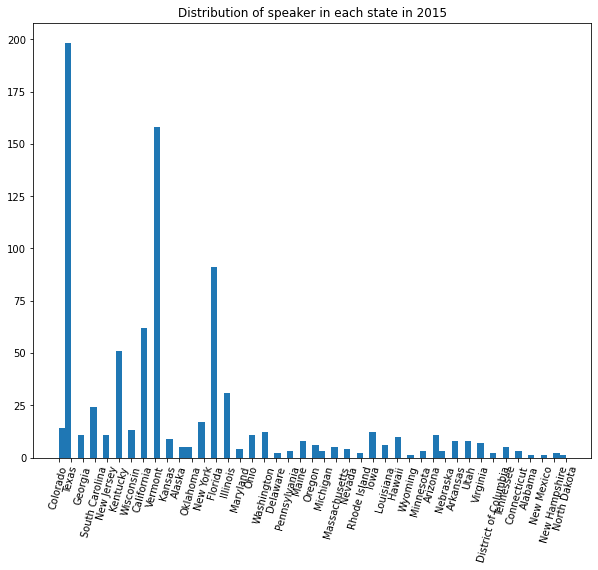

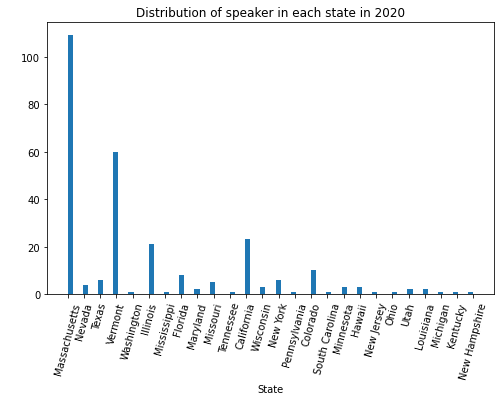

In [146]:
##WE NEED A KIND OF NORMALIZATION CAUSE WE COMPARE DATA THAT ARE NOT FROM THE SAME SIZE --> WE HAVE A LOT MORE OF
##DATA IN ONE OF THE MERGED THAN THE OTHER
plt.figure(figsize=(10,8))
plt.hist(merged['state'].values, bins = 80)
plt.title("Distribution of speaker in each state in 2015")
plt.xticks(rotation=75)
plt.figure(figsize=(8,5))
plt.hist(merged20['state'].values, bins = 80)
plt.title("Distribution of speaker in each state in 2020")
plt.xticks(rotation=75)
plt.xlabel("State")
plt.ylabel(" ")
plt.show()

For year 2015, Texas, Vermont and Florida are the most represented states in our data.
For 2020, these are Massachysetts and Vermont.

**Now, we want to see the distribution of hatecrime due to sexual orientation in each state. We focus, for the moment, on data from 2015**

In [83]:
#Let's upload our data on hatecrime:
#We only keep data relevant for our subject, that is sexual orientation and gender identity
hc2015=pd.read_csv('data/hatecrime2015.csv')
hc2015.sort_index()
hc2015=hc2015.drop(columns=['Agency Type', 'Race/\nEthnicity/\nAncestry', 'Religion','Disability','Gender', '1st\nquarter'
                    , '2nd\nquarter','3rd\nquarter', '4th\nquarter', 'Agency name' ])

In [84]:
#remove unrelevant line spotted in the file
for i in range(hc2015.shape[0]):
    if (hc2015.State.loc[i]=='3 Includes one incident reported with more than one bias motivation.'):
        hc2015.State.loc[i]='NaN'

C:\Users\Pont Naomie\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [85]:
#The state value is filled once and then only NaN value for all the following rows until new state, therefore we fill in
# the NaN value with the relevant State 
hc=hc2015.fillna(method='ffill', axis=0)
hc=hc.rename(columns = {'Sexual\norientation': 'sexual_orientation', 'Gender\nIdentity': 'gender_identity'})

In [86]:
#last lines are non valid with respect to our study, therefore we drop them
hc=hc.drop(labels=[1980,1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], axis=0)

In [87]:
nb_hc=hc.groupby(['State']).sum()

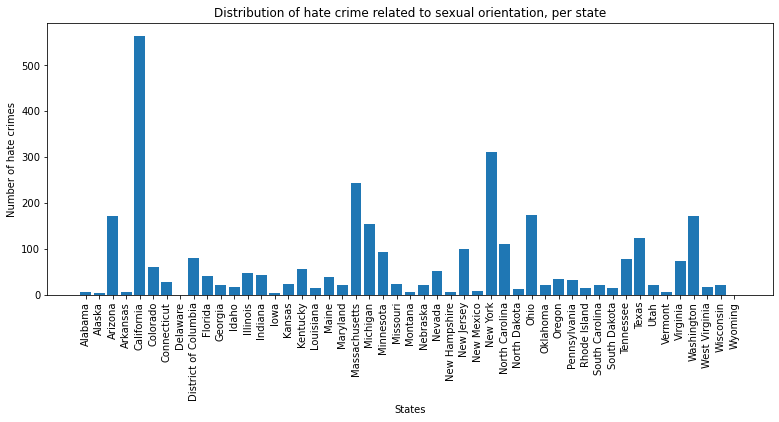

In [88]:
#let's plot the distribution of hate crime related to sexual orientation, per state
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.sexual_orientation)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of hate crime related to sexual orientation, per state')
plt.xticks(rotation = 90)
plt.show()

We can see that California has the highest number of hate crime related to sexual orientation. It is interesting to point it out as we have seen in the previous plot that California has lots of speakers on the matter of gay rights. 

Indeed, after looking up on Internet, hate crimes with a sexual orientation bias are the second most common type of hate crime over 2006-2015 in California.

Let's check if we have a bias due to a high number of speakers in California or to a politician well known for its implication in the LGBT topic:

In [89]:
#is there a bias? let's have a look at the number of occurrences for speakers in California:
california=merged[merged['state']=='California']
california_speaker=california.speaker.tolist()
#keep only one of each duplicates
california_speaker=list(set(california_speaker))
speaker_california=per_speaker.loc[california_speaker]
speaker_california

,numOccurrences
speaker,
Ami Bera,1
Nancy Pelosi,30
Jackie Speier,17
Doug LaMalfa,1
Barbara Lee,7
Dianne Feinstein,3
Loretta Sanchez,1
Ted Lieu,17
Duncan Hunter,15


In [105]:
x=975/speaker_california.numOccurrences.max()
print("The maximum number of occurrences per speaker was attributed to Bernie Sanders: 975",
     "\nThe highest value from the list above is smaller by a factor: {}.".format(x), 
      "Thus we conclude there is no bias.")


The maximum number of occurrences per speaker was attributed to Bernie Sanders: 975 
The highest value from the list above is smaller by a factor: 32.5. Thus we conclude there is no bias.


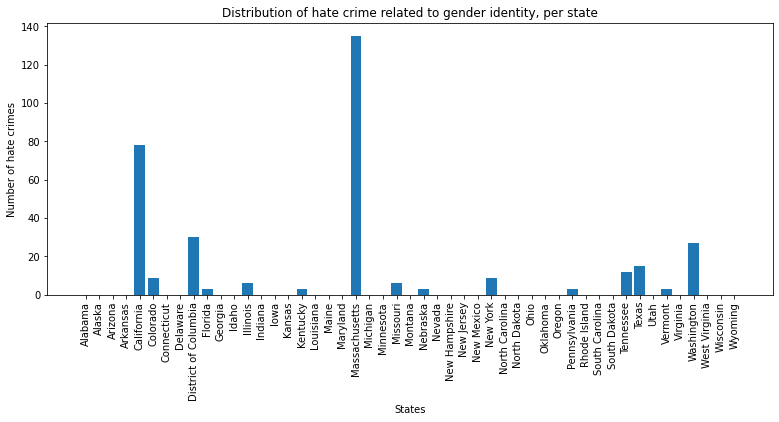

In [49]:
#same plot but for gender identity
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.gender_identity)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of hate crime related to gender identity, per state')
plt.xticks(rotation = 90)
plt.show()

We can see that gender identity related hate crime are not present in lots of state. It is probably because in 2015, we were less talking about gender identity than nowadays. Therefore, probably less people reported it as gender identity hate crime.
Nevertheless, we can see that in Massachussetts and California, there have been important number of agressions. For Massachussetts, there are approximately same number of hate crime due to gender identity and sexual orientation, therefore the whole lgbtqa+ community is very much targeted. 

In [96]:
#As we have a majority of speakers with very few quotations, and a minority with many quotations, 
#we set a threshold for the visualization
merged_quot=merged[merged['numOccurrences']>20]

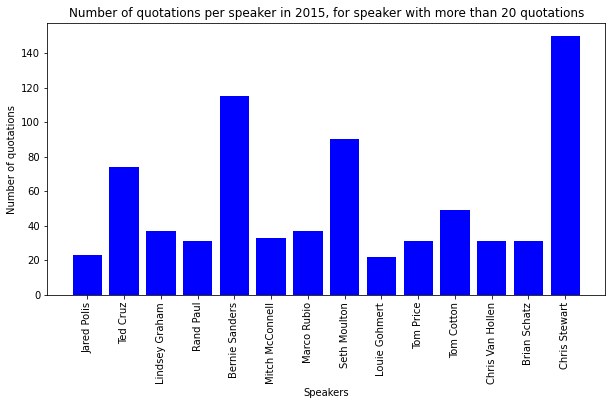

In [95]:
#visualization of the number of quotations per speaker, with a minimum of 20 quotations:
plt.figure(figsize=(10,5))
plt.bar(merged_quot.speaker, merged_quot.numOccurrences, color='blue')
plt.xlabel('Speakers')
plt.ylabel('Number of quotations')
plt.title('Number of quotations per speaker in 2015, for speaker with more than 20 quotations')
plt.xticks(rotation=90)
plt.show()

Bernie Sanders and Chris Stewart are obviously talking a lot about this topic. 

In [112]:
speaker_quot=(merged_quot.groupby("speaker")['numOccurrences'].sum()).index.tolist()
#to do: display the states corresponding to these speakers, to have kind of a normalization measure

In [94]:
#get the number of occurences of all the quotations for a state
grouped_by_state = merged.groupby('state').agg({'numOccurrences' : sum})#sum()

#Add a column with the number of different quotations for a state
grouped_by_state['numQuotations']= merged.state.value_counts()
grouped_by_state.sort_values(by = 'numOccurrences', ascending=False)

,numOccurrences,numQuotations
state,,
Vermont,980,158
Texas,625,198
Florida,312,91
Kentucky,258,51
Utah,165,8
California,104,62
Massachusetts,95,5
Arkansas,95,8
South Carolina,92,24


This graph which represents differences between the number of different quotations and total number of occurences per speaker allows us to deduce if the topic of LGBT community is in the spotlights thanks to some particular speakers. 

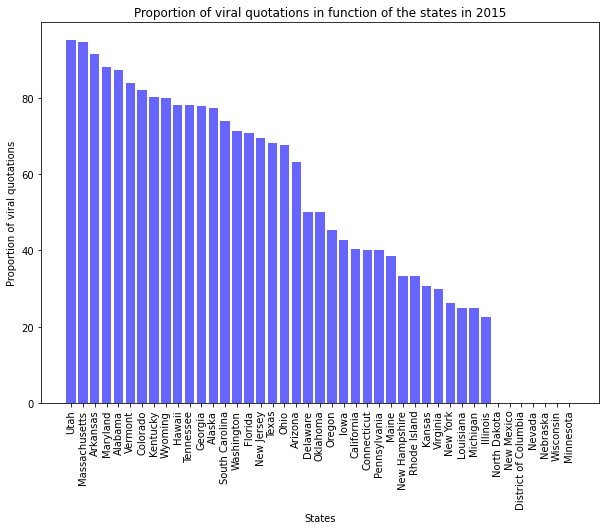

In [23]:
grouped_by_state['proportional_numQuotations'] = (grouped_by_state.numQuotations/grouped_by_state.numOccurrences)*100
grouped_by_state=grouped_by_state.sort_values(by= 'proportional_numQuotations', ascending=True)
plt.figure(figsize=(10,7))
plt.bar(grouped_by_state.index, 100-grouped_by_state.proportional_numQuotations, color='blue', alpha=0.6, label = "number of different quotations" )
plt.xlabel('States')
plt.ylabel('Proportion of viral quotations')
plt.xticks(rotation=90)
plt.title("Proportion of viral quotations in function of the states in 2015")
plt.show()

This graph presents the proportion of viral quotations for each state.
In fact, we compute the percentage of the number of diferrent quotations over the total numbers of occurences of quotations for each state and displays 100 minus this proportion to get the proportion of viral quotations. 

If there is a low number of quotations in a specific state and the total number of occurences is very high, this means that these quotations were widely quoted by other speakers or in media supports such as articles and that we talked a lot about it. We assume that if we discuss and mention many times a quotation, it went **viral** and may be polemical.

For example, in Utah,the proportion of different quotations is very low. This means there is a high number of occurences for just a few different quotations. We see in the previous table that it is on a significant number of occurences. Concretely, it means it is probably a polemical sentence.

In [24]:
#file lgbt population:
lgbtpopulation=pd.read_csv("data/lgbtpopulation2021.csv")

#clean it:
lgbtpopulation=lgbtpopulation.dropna(how='any', axis=0)
lgbtpopulation.groupby("STATE").sum() #in case there are duplicates of states across rows
lgbtpopulation.sample(10)

,STATE,TOTAL ADULT POPULATION,LGBT ADULT POPULATION,LGBT POPULATION DENSITY,% OF LGBTQ INDIVIDUALS RAISING CHILDREN,% OF SAME-SEX COUPLES RAISING CHILDREN
47,TEXAS,"28,701,845","1,053,000",4.100%,29.00%,19.800%
52,WASHINGTON,"7,535,591","342,000",5.200%,28.00%,15.800%
40,OREGON,"4,190,713","207,000",5.600%,23.00%,16.300%
3,ARIZONA,"7,171,646","286,000",4.500%,25.00%,16.500%
6,COLORADO,"5,695,564","234,000",4.600%,25.00%,15.900%
53,WEST VIRGINIA,"1,805,832","68,000",4.00%,31.00%,17.800%
51,VIRGINIA,"8,517,685","308,000",3.900%,26.00%,16.00%
25,MINNESOTA,"5,611,179","210,000",4.100%,28.00%,16.500%
9,DISTRICT OF COLUMBIA,"702,455","58,000",9.800%,9.00%,8.700%
17,IOWA,"3,156,145","106,000",3.600%,27.00%,18.600%


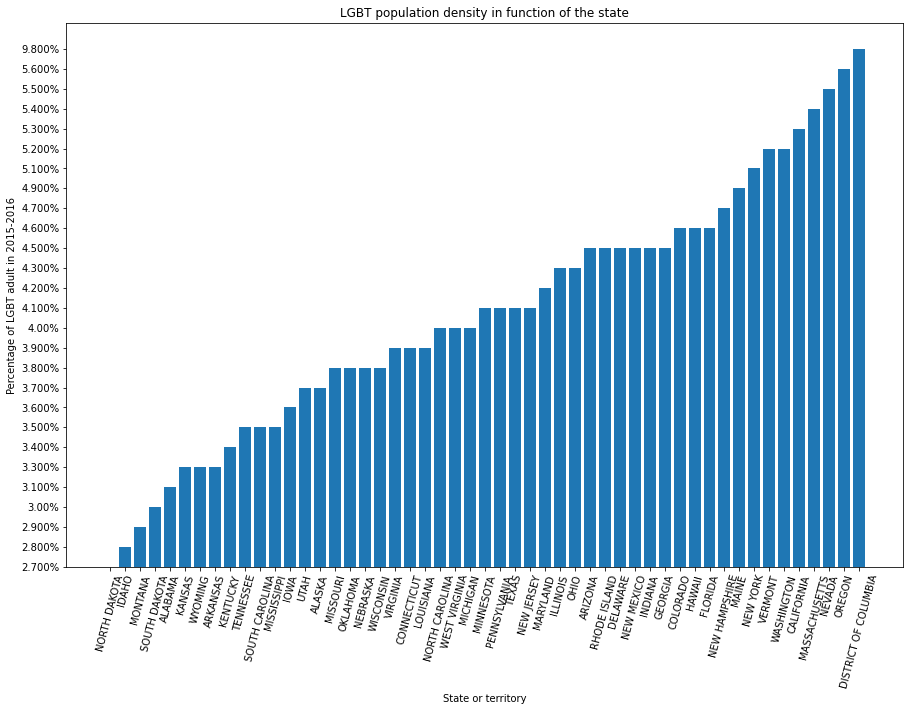

In [25]:
lgbtpopulation=lgbtpopulation.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)
plt.figure(figsize=(15,10))
plt.bar(lgbtpopulation['STATE'],lgbtpopulation['LGBT POPULATION DENSITY'])
plt.title("LGBT population density in function of the state")
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.show()

We can see that North Dakota is the state with the smallest percentage of LGBT adults for the years 2015-2016, while in Oregon or in the District of Colombia the density is way higher. Note that these data are probably obtained from surveys, therefore it doesn't correspond to the exact reality because some people may have not tell the truth nor filled in the form. Further studies would be interesting to see if these states are related to the ones where we have the more quotations, or how they are related to hate crimes for example.

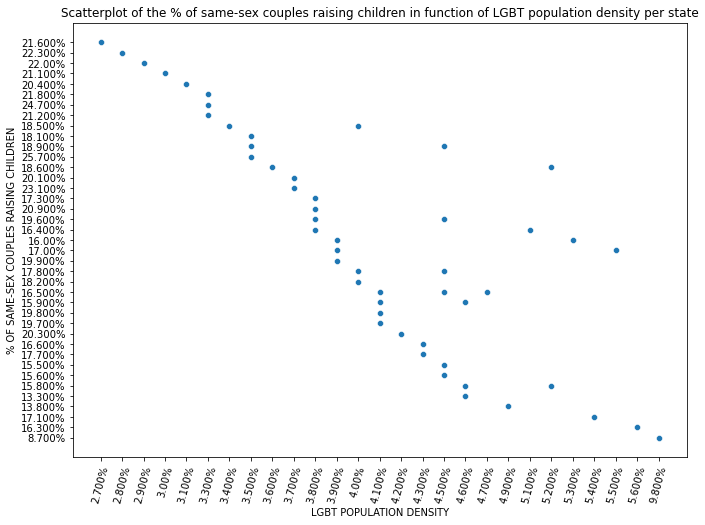

In [58]:
#Correlation between LGBT population density and percentage of same-sex couples raising children
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
plt.xticks(rotation=75)
sns.scatterplot(data=lgbtpopulation, x='LGBT POPULATION DENSITY', y='% OF SAME-SEX COUPLES RAISING CHILDREN', ax=ax).set(title="Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state") 
plt.show()

We will discuss it later, here we are just doing some pre-processing steps and visualizations but it seems that we have a negative correlation between these two categories.

In [26]:
#file lgbtsummary
lgbtsummary=pd.read_csv("data/lgbtsummary.csv")
lgbtsummary=lgbtsummary[:-1] #remove last row to sort by increasing population rank
lgbtsummary=lgbtsummary[['Pop.rank', 'State or territory', '2015–2016 LGBTadult percentageestimate[7]', 
                         '2016 transgender adult percentage estimate[2]']]
lgbtsummary=lgbtsummary.rename(columns={"2015–2016 LGBTadult percentageestimate[7]": 
                                        "Percentage of LGBT adult in 2015-2016", 
                                        "2016 transgender adult percentage estimate[2]": 
                                        "Percentage of transgender adult in 2016"})
lgbtsummary.head(lgbtsummary.shape[0]) #just to check that it is well ordered throughout the dataframe


,Pop.rank,State or territory,Percentage of LGBT adult in 2015-2016,Percentage of transgender adult in 2016
0,1,California,4.8%,0.76%
1,2,Texas,3.6%,0.66%
2,3,New York,4.5%,0.51%
3,4,Florida,4.2%,0.66%
4,5,Illinois,3.7%,0.51%
5,6,Ohio,3.8%,0.45%
6,7,Michigan,3.8%,0.43%
7,8,Georgia,4.0%,0.75%
8,9,Pennsylvania,3.6%,0.44%
9,10,New Jersey,3.6%,0.44%


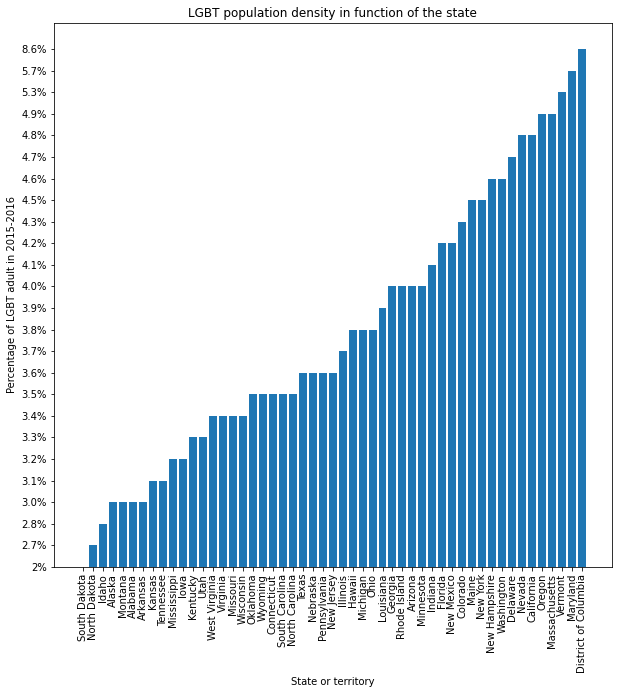

In [60]:
lgbtsummary=lgbtsummary.sort_values(by='Percentage of LGBT adult in 2015-2016', axis=0)
plt.figure(figsize=(10,10))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of LGBT adult in 2015-2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.title("LGBT population density in function of the state")
plt.show()

It shows similar results as in lgbtpopulation: our data seem to be trustable.

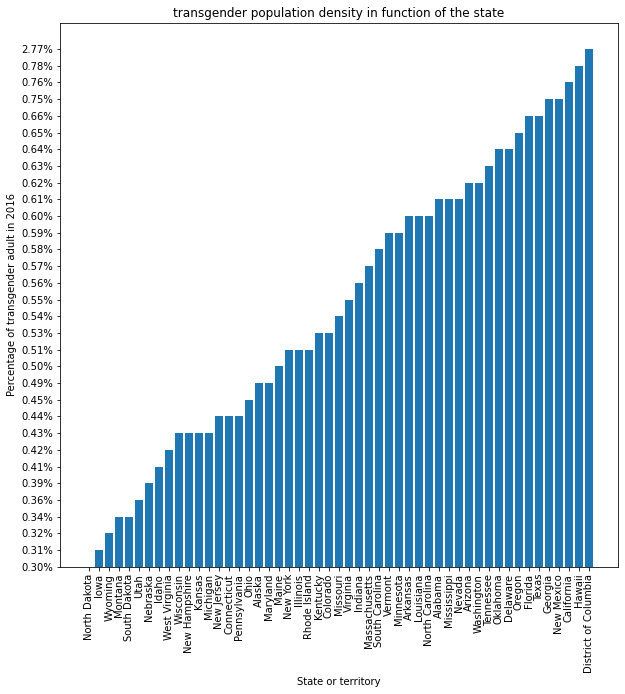

In [27]:
lgbtsummary=lgbtsummary.sort_values(by='Percentage of transgender adult in 2016', axis=0)
plt.figure(figsize=(10,10))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of transgender adult in 2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of transgender adult in 2016")
plt.title("transgender population density in function of the state")
plt.show()

Same as for the lgbt population: the states with the highest and smallest density are respectively District of Columbia and North Dakota.